<a href="https://colab.research.google.com/github/Hyunj5ng/machine-learning-practice/blob/main/4_8_using_expert_knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 12.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=846e9f61d1dc5412ee848d332db6efb448b62243fbbede13c915217e00091f67
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 4.8 using expert knowledge

In [ ]:
citibike = mglearn.datasets.load_citibike()

print("city bike data:\n", citibike.head())

city bike data:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'frequency')

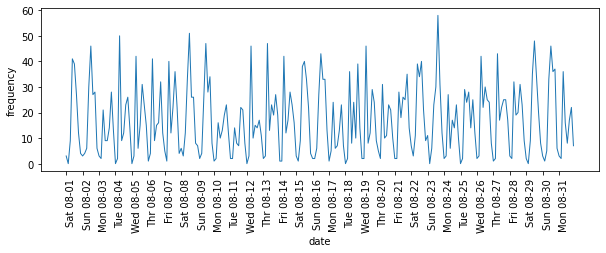

In [ ]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["Sun", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("date")
plt.ylabel("frequency")

In [ ]:
# extract the target value(frequency)
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [ ]:
# using first 184 data for training set and the rest of them for test set
n_train = 184

#function evaluating it on the features and making the graph
def eval_on_features(features, target, regressor):
  #split training and test set
  X_train, X_test = features[:n_train], features[n_train:]
  #split the target value also
  y_train, y_test = target[:n_train], target[n_train:]
  regressor.fit(X_train, y_train)
  print("test set score: {:.2f}".format(regressor.score(X_test, y_test)))
  y_pred = regressor.predict(X_test)
  y_pred_train = regressor.predict(X_train)
  plt.figure(figsize=(10, 3))

  plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
  plt.plot(range(n_train), y_train, label="training")
  plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
  plt.plot(range(n_train), y_pred_train, '--', label="training prediction")
  plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
           label="test prediction")
  plt.legend(loc=(1.01, 0))
  plt.xlabel("date")
  plt.ylabel("frequency")

test set score: -0.04


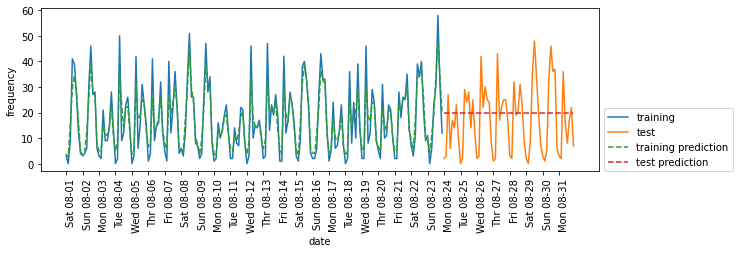

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

test set score: 0.60


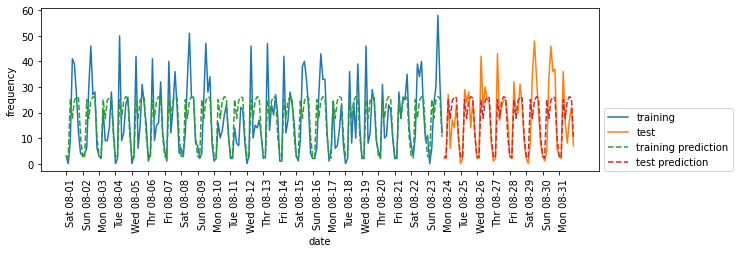

In [ ]:
#add time
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

test set score: 0.84


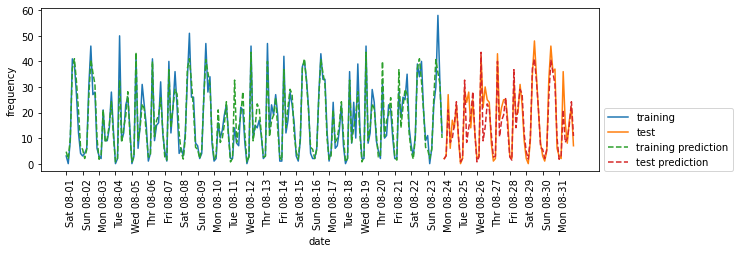

In [ ]:
#add days
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

test set score: 0.62


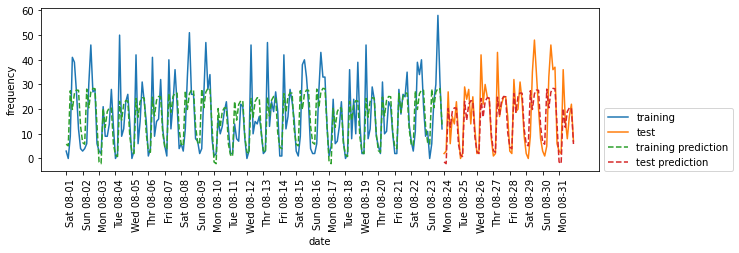

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

test set score: 0.85


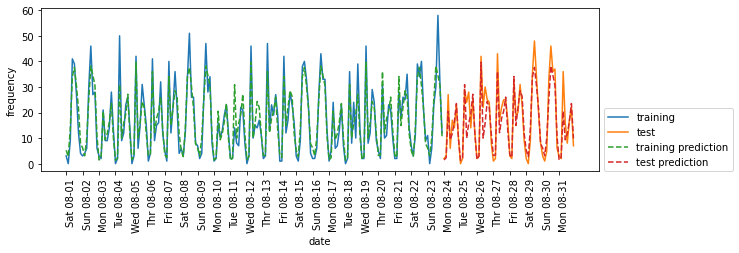

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [ ]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thr", "fri", "Sat", "Sun"]
features = day + hour

In [ ]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'coefficent size')

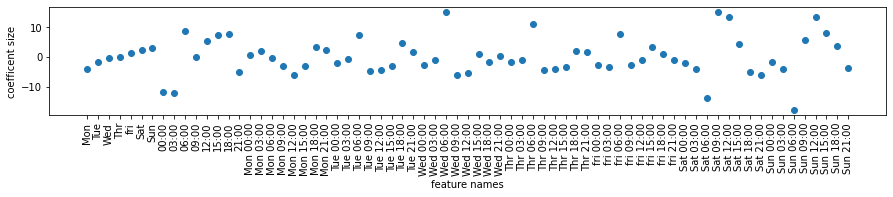

In [ ]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("feature names")
plt.ylabel("coefficent size")